# DATA PREPARATION

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Data

In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Geraldo Wibowo\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
loan_data = loan_data_backup.copy()

## General Data Exploration

In [47]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [48]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# General preprocessing (change 'object' to 'float')

##### emp_length (remove 'years')

In [49]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [50]:
type(loan_data['emp_length_int'][0])

numpy.float64

##### earliest_cr_line (pd.to_datetime)

In [51]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

#find the total months since recorded until now (2017-12-01)
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [52]:
#chaning negative values for 'mths_since_earliest_cr_line' to the max positive number in 'mths_since_earliest_cr_line'
#e.g. 2060 is assumed to be 1960
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-52-c1dfc00707d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


##### term

In [53]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
type(loan_data['term_int'][0])

numpy.int64

##### issue_d

In [54]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
type(loan_data['mths_since_issue_d'][0])

numpy.float64

#### Preprocessing other discrete variables

In [55]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [56]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
type(loan_data_dummies)

pandas.core.frame.DataFrame

# PREPROCESSING
## Check for missing values

In [25]:
pd.options.display.max_rows = 75
loan_data.isnull().sum().sort_values(ascending = False)

inq_last_12m                   466285
dti_joint                      466285
annual_inc_joint               466285
total_cu_tl                    466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
inq_fi                         466285
verification_status_joint      466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_cur_bal                     70276
total_rev_hi_lim                70276
tot_coll_amt                    70276
emp_title                       27588
emp_length  

In [57]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# Preparing Dependent Variable ('loan_status') >> 'good_bad'

In [60]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [61]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

# Splitting Data

In [63]:
from sklearn.model_selection import train_test_split

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_train.shape)
print(loan_data_targets_test.shape)

(373028, 207)
(93257, 207)
(373028,)
(93257,)


In [145]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test

## Fine classing, weight of evidence, and coarse classing
- Fine Classing = Turning Continuous variable into categories
- Weight of evidence = to what extent an independent variable would predict a dependent variable
- Coarse Classing = The process of constructing new categories based on the intial ones
- Information Value = how much information the original independent variable brings with respect to explaining the dependent variable

In [146]:
#function for finding the weight of evidence and information value 
#of a discrete variable after fine classing
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#visualizing WoE
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

# Coarse Classing Categorical Discrete Variables
(based on weight of evidence)

##### grade

In [148]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


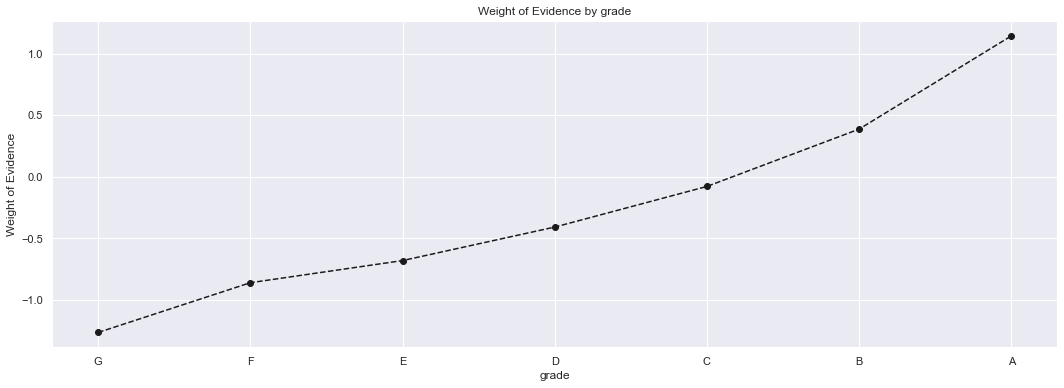

In [149]:
plot_by_woe(df_temp)

##### home_ownership

In [150]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,NaN,NaN,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022222,0.133531,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.074003,0.550534,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.014568,0.139406,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.016179,0.174928,0.022938


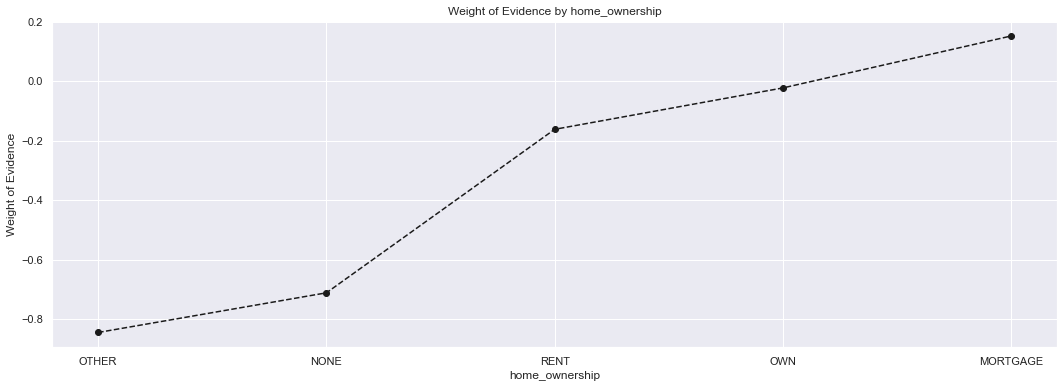

In [151]:
plot_by_woe(df_temp)

In [152]:
#combine 'OTHER', 'NONE', 'RENT' (small n_obs)
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

##### addr_state

In [153]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,0.355932,1.781907,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,0.004150,0.034067,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,0.009977,0.085508,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,0.003037,0.027137,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,0.002312,0.021027,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,0.000698,0.006416,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,0.003859,0.036038,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,0.000928,0.008817,inf


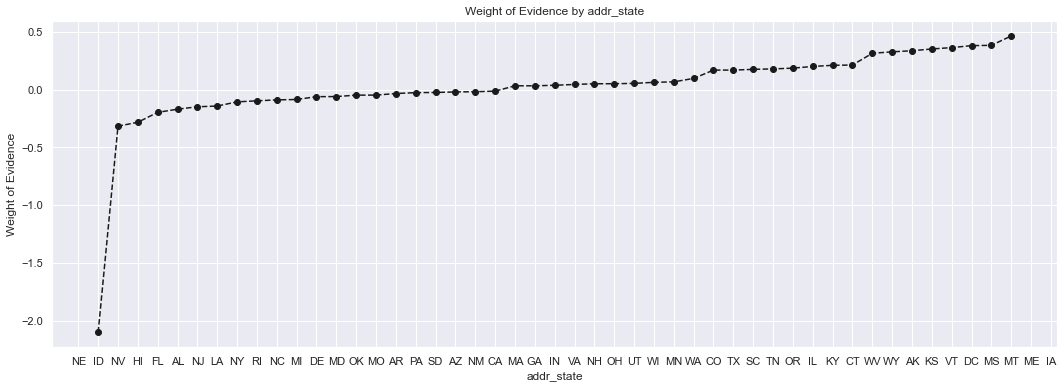

In [154]:
plot_by_woe(df_temp)

In [155]:
#ND value does not have any n_obs
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [156]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

##### verification_status

In [157]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,NaN,NaN,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.023707,0.231704,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.011152,0.125494,0.022684


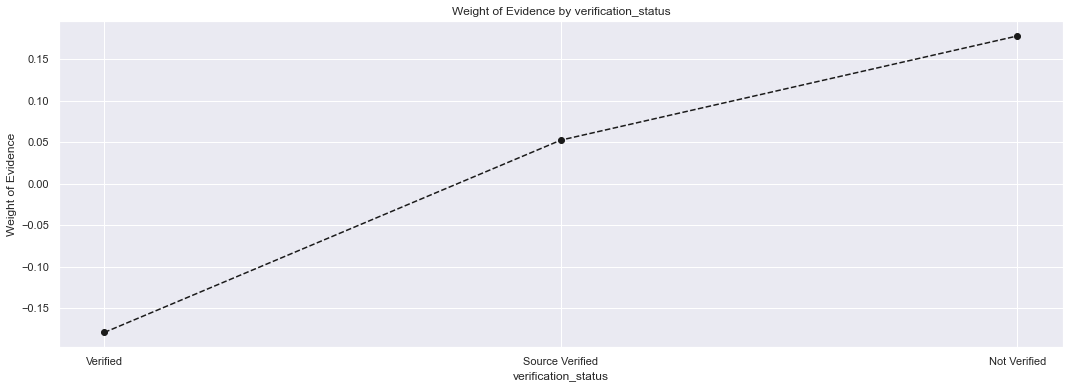

In [158]:
#does not need coarse classing
plot_by_woe(df_temp)

##### purpose

In [159]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.002159,-0.984590,NaN,NaN,0.045124
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.001570,-0.881845,0.018620,0.102745,0.045124
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.031305,-0.849516,0.005650,0.032329,0.045124
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.012856,-0.305210,0.080220,0.544307,0.045124
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.006084,-0.293130,0.001471,0.012080,0.045124
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.065554,-0.274561,0.002237,0.018569,0.045124
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.006084,-0.249024,0.003028,0.025537,0.045124
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.007164,-0.117712,0.014702,0.131312,0.045124
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.005790,-0.095845,0.002311,0.021867,0.045124
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.615898,-0.048556,0.004867,0.047289,0.045124


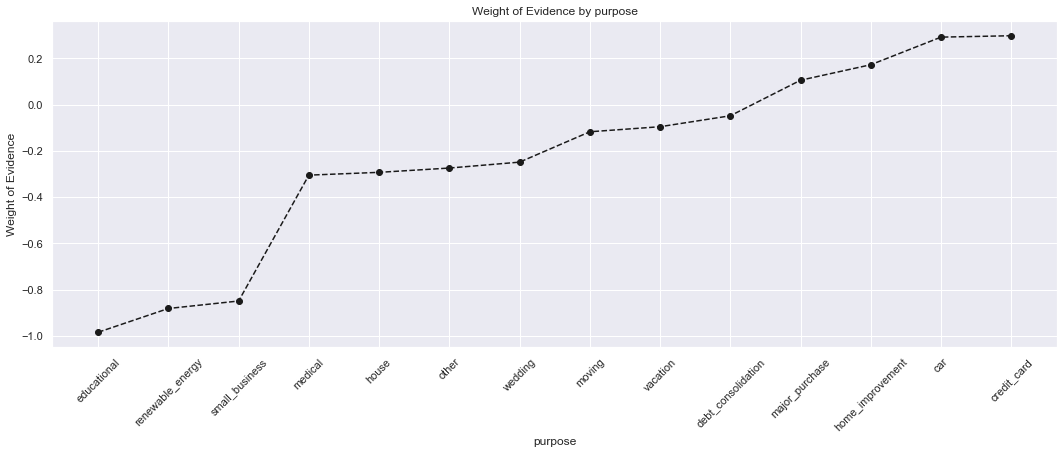

In [160]:
plot_by_woe(df_temp, 45)

In [161]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

##### initial_list_status

In [162]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60491,0.879685,0.648648,53213.0,7278.0,0.640603,0.71423,-0.108794,NaN,NaN,0.024888
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.359397,0.28577,0.229238,0.031443,0.338032,0.024888


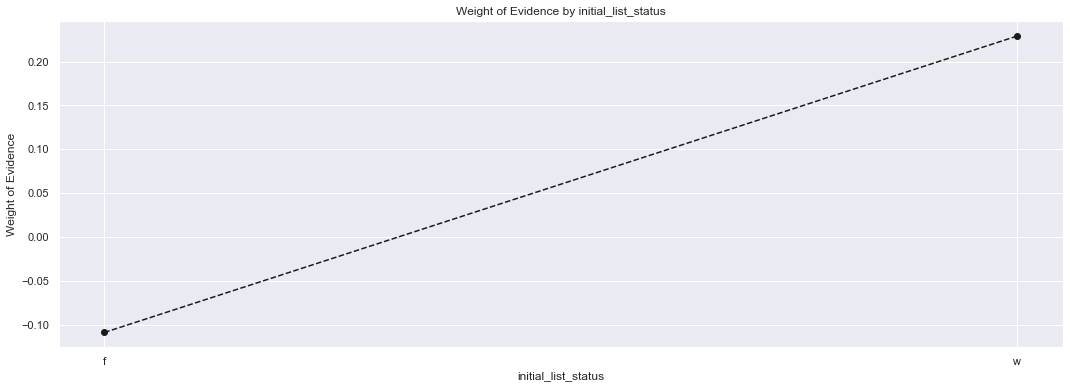

In [163]:
plot_by_woe(df_temp)

# Coarse Classing Continuous Variables
(based on weight of evidence, sorted by the variable values, not by the WOE)

In [164]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE']) # sorted by the variable values, not by the WOE
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

##### term_int

In [165]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,NaN,NaN,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.043016,0.414608,0.036603


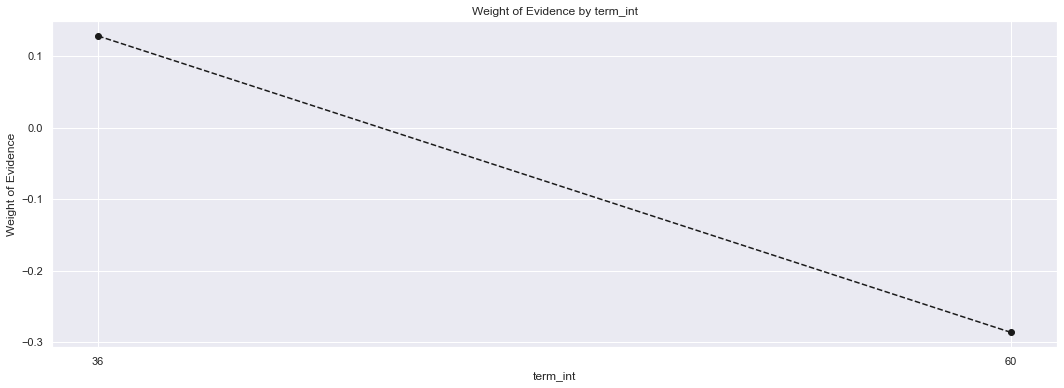

In [166]:
plot_by_woe(df_temp)

In [167]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

##### emp_length_int

In [168]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11553,0.874491,0.123883,10103.0,1450.0,0.121625,0.142296,-0.156972,NaN,NaN,0.007766
1,1.0,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.062905,0.019273,0.018102,0.176245,0.007766
2,2.0,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.005192,0.053039,0.007766
3,3.0,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.001923,0.019389,0.007766
4,4.0,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.000144,0.001465,0.007766
5,5.0,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.003208,0.032228,0.007766
6,6.0,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007409,0.071500,0.007766
7,7.0,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.014736,0.146326,0.007766
8,8.0,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.003451,0.035790,0.007766
9,9.0,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.002711,0.028024,0.007766


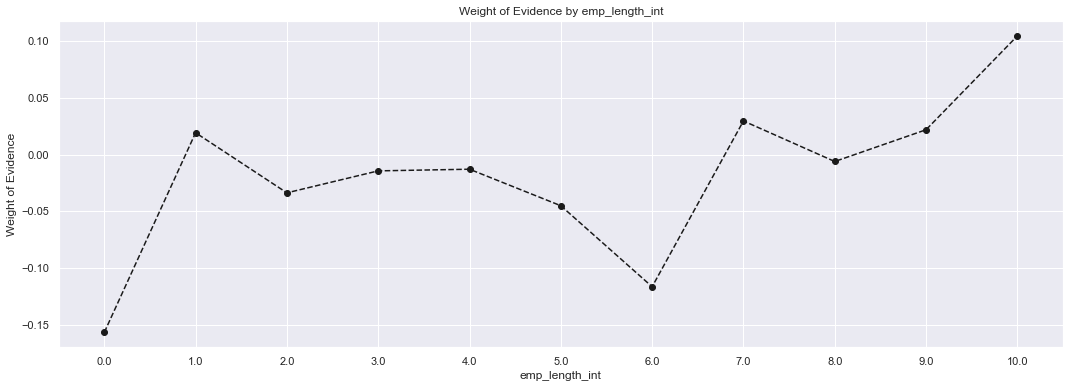

In [169]:
plot_by_woe(df_temp)

In [170]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

##### mths_since_issue_d (using pd.cut) (unique variables are too much)

In [171]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,NaN,NaN,0.126297
1,"(37.8, 39.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.015392,0.266241,0.126297
2,"(39.6, 41.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.010428,0.150833,0.126297
3,"(41.4, 43.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.010829,0.138715,0.126297
4,"(43.2, 45.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.068793,0.131267,0.006248,0.073381,0.126297
5,"(45.0, 46.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.031894,0.047781,0.007572,0.083487,0.126297
6,"(46.8, 48.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.005027,0.052525,0.126297
7,"(48.6, 50.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.004339,0.043669,0.126297
8,"(50.4, 52.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.007022,0.067693,0.126297
9,"(52.2, 54.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.004770,0.044080,0.126297


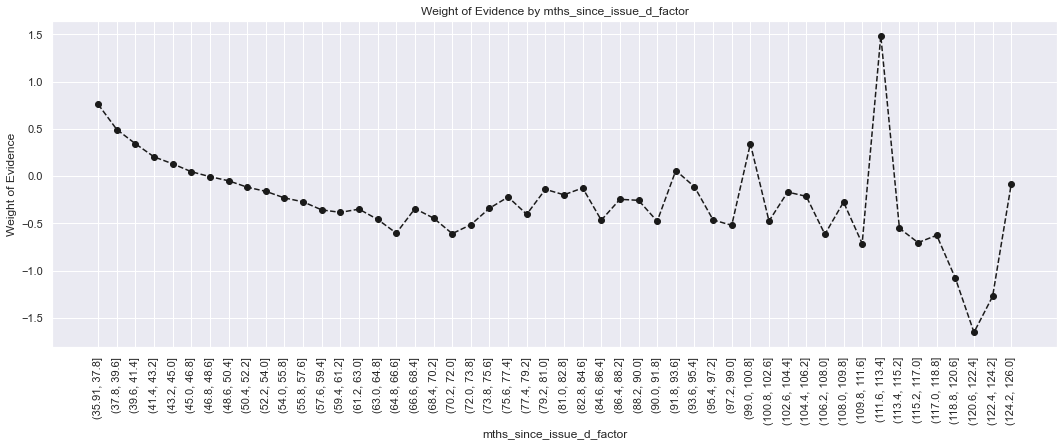

In [172]:
plot_by_woe(df_temp, 90)

In [173]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

##### int_rate

In [174]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


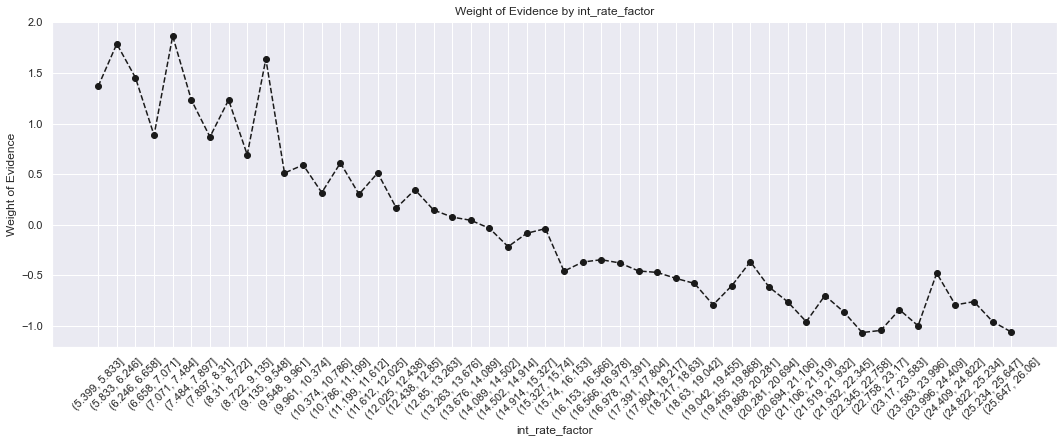

In [175]:
plot_by_woe(df_temp, 45)

In [176]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

##### funded_amnt_factor

In [177]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,NaN,NaN,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.015372,0.155467,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.003948,0.043194,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.006417,0.069472,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.002215,0.023117,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.008625,0.086254,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.015213,0.156305,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.008438,0.095840,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.024754,0.262767,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.011563,0.116015,0.018663


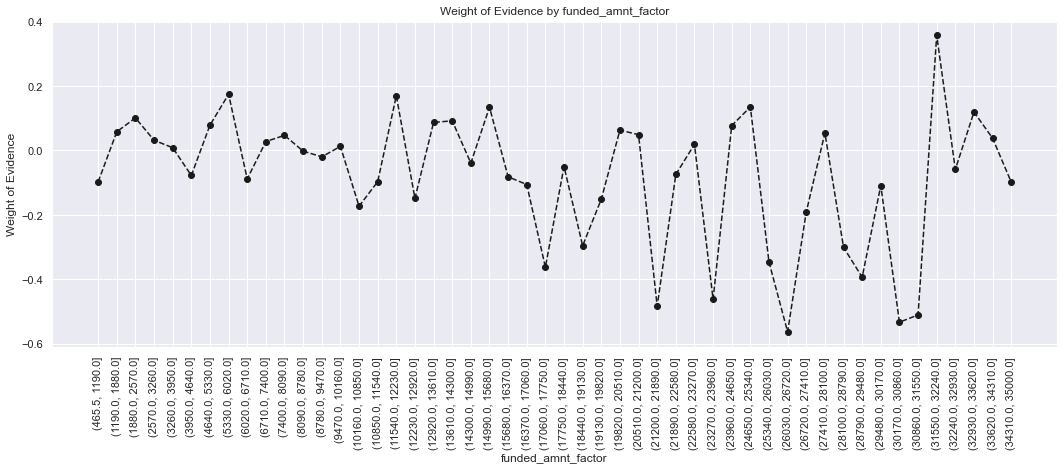

In [178]:
plot_by_woe(df_temp, 90)

##### mths_since_earliest_cr_line_factor

In [179]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",182,0.923077,0.001952,168.0,14.0,0.002022,0.001374,0.386666,NaN,NaN,inf
7,"(82.18, 93.92]",508,0.913386,0.005447,464.0,44.0,0.005586,0.004318,0.257454,0.009691,0.129212,inf
8,"(93.92, 105.66]",715,0.851748,0.007667,609.0,106.0,0.007331,0.010402,-0.349861,0.061638,0.607316,inf
9,"(105.66, 117.4]",1268,0.854890,0.013597,1084.0,184.0,0.013050,0.018057,-0.324763,0.003141,0.025098,inf


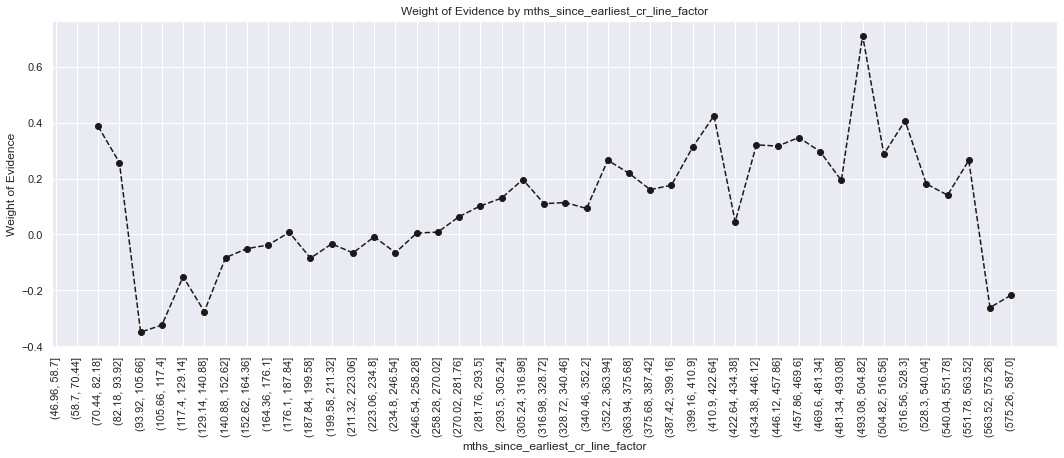

In [180]:
plot_by_woe(df_temp, 90)

In [181]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

##### delinq_2yrs

In [182]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76566,0.890944,0.821021,68216.0,8350.0,0.821217,0.819431,0.002177,NaN,NaN,inf
1,1.0,11297,0.890413,0.121138,10059.0,1238.0,0.121095,0.121492,-0.003270,0.000530,0.005447,inf
2,2.0,3192,0.885025,0.034228,2825.0,367.0,0.034009,0.036016,-0.057339,0.005388,0.054069,inf
3,3.0,1134,0.893298,0.012160,1013.0,121.0,0.012195,0.011874,0.026640,0.008273,0.083979,inf
4,4.0,510,0.886275,0.005469,452.0,58.0,0.005441,0.005692,-0.045001,0.007024,0.071642,inf
5,5.0,270,0.911111,0.002895,246.0,24.0,0.002961,0.002355,0.229037,0.024837,0.274039,inf
6,6.0,128,0.859375,0.001373,110.0,18.0,0.001324,0.001766,-0.288132,0.051736,0.517169,inf
7,7.0,67,0.925373,0.000718,62.0,5.0,0.000746,0.000491,0.419456,0.065998,0.707588,inf
8,8.0,29,0.896552,0.000311,26.0,3.0,0.000313,0.000294,0.061244,0.028821,0.358212,inf
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000253,0.000098,0.946282,0.057994,0.885038,inf


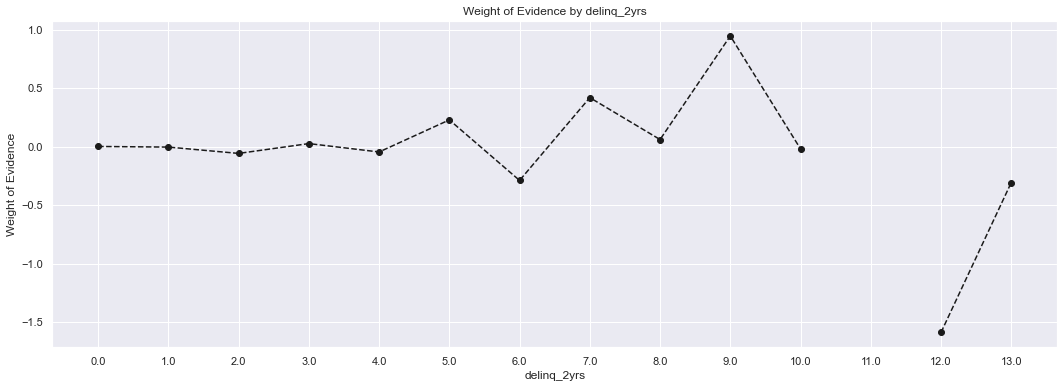

In [183]:
plot_by_woe(df_temp)

In [184]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

##### inq_last_6mths

In [185]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48295,0.910094,0.517870,43953.0,4342.0,0.529127,0.426104,0.216545,NaN,NaN,inf
1,1.0,25985,0.882394,0.278639,22929.0,3056.0,0.276030,0.299902,-0.082945,0.027701,0.299490,inf
2,2.0,11611,0.861252,0.124505,10000.0,1611.0,0.120385,0.158096,-0.272511,0.021141,0.189566,inf
3,3.0,5086,0.846245,0.054537,4304.0,782.0,0.051814,0.076742,-0.392795,0.015008,0.120285,inf
4,4.0,1431,0.841370,0.015345,1204.0,227.0,0.014494,0.022277,-0.429786,0.004875,0.036991,inf
5,5.0,551,0.842105,0.005908,464.0,87.0,0.005586,0.008538,-0.424264,0.000736,0.005522,inf
6,6.0,211,0.763033,0.002263,161.0,50.0,0.001938,0.004907,-0.928859,0.079072,0.504595,inf
7,7.0,36,0.527778,0.000386,19.0,17.0,0.000229,0.001668,-1.987015,0.235255,1.058156,inf
8,8.0,21,0.523810,0.000225,11.0,10.0,0.000132,0.000981,-2.002930,0.003968,0.015915,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000036,0.000393,-2.385923,0.095238,0.382992,inf


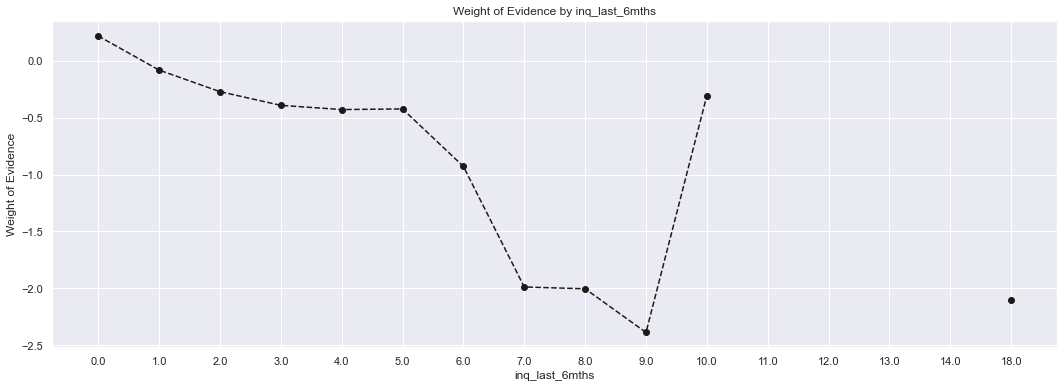

In [186]:
plot_by_woe(df_temp)

In [187]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

##### open_acc

In [188]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,NaN,NaN,inf
1,1.0,32,0.875000,0.000343,28.0,4.0,0.000337,0.000393,-0.152331,0.125000,inf,inf
2,2.0,334,0.838323,0.003582,280.0,54.0,0.003371,0.005299,-0.452435,0.036677,0.300105,inf
3,3.0,1122,0.852941,0.012031,957.0,165.0,0.011521,0.016192,-0.340383,0.014618,0.112052,inf
4,4.0,2560,0.892188,0.027451,2284.0,276.0,0.027496,0.027085,0.015042,0.039246,0.355425,inf
5,5.0,4403,0.891438,0.047214,3925.0,478.0,0.047251,0.046909,0.007270,0.000750,0.007772,inf
6,6.0,6216,0.890766,0.066655,5537.0,679.0,0.066657,0.066634,0.000346,0.000672,0.006924,inf
7,7.0,7433,0.886856,0.079704,6592.0,841.0,0.079358,0.082532,-0.039220,0.003910,0.039567,inf
8,8.0,8314,0.893433,0.089151,7428.0,886.0,0.089422,0.086948,0.028054,0.006577,0.067275,inf
9,9.0,8768,0.888230,0.094020,7788.0,980.0,0.093756,0.096173,-0.025454,0.005203,0.053508,inf


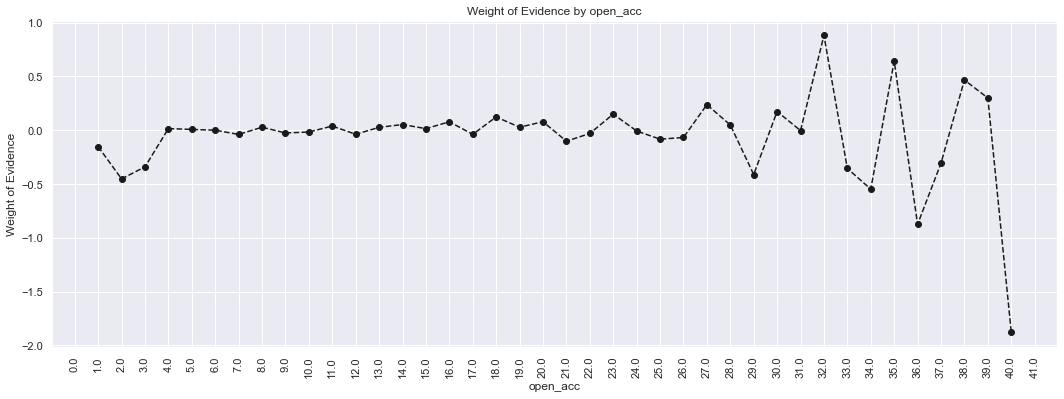

In [189]:
plot_by_woe(df_temp, 90)

In [190]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

##### pub_rec

In [191]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80923,0.889179,0.867742,71955.0,8968.0,0.866228,0.880079,-0.015862,NaN,NaN,inf
1,1.0,10670,0.901125,0.114415,9615.0,1055.0,0.115750,0.103533,0.111543,0.011946,0.127405,inf
2,2.0,1097,0.904284,0.011763,992.0,105.0,0.011942,0.010304,0.147522,0.003160,0.035979,inf
3,3.0,331,0.900302,0.003549,298.0,33.0,0.003587,0.003238,0.102345,0.003982,0.045177,inf
4,4.0,112,0.857143,0.001201,96.0,16.0,0.001156,0.001570,-0.306481,0.043159,0.408826,inf
5,5.0,73,0.904110,0.000783,66.0,7.0,0.000795,0.000687,0.145504,0.046967,0.451985,inf
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000205,0.000196,0.041825,0.009373,0.103678,inf
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000132,0.000294,-0.798958,0.109023,0.840783,inf
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000098,-0.711946,0.014286,0.087011,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.200000,inf,inf


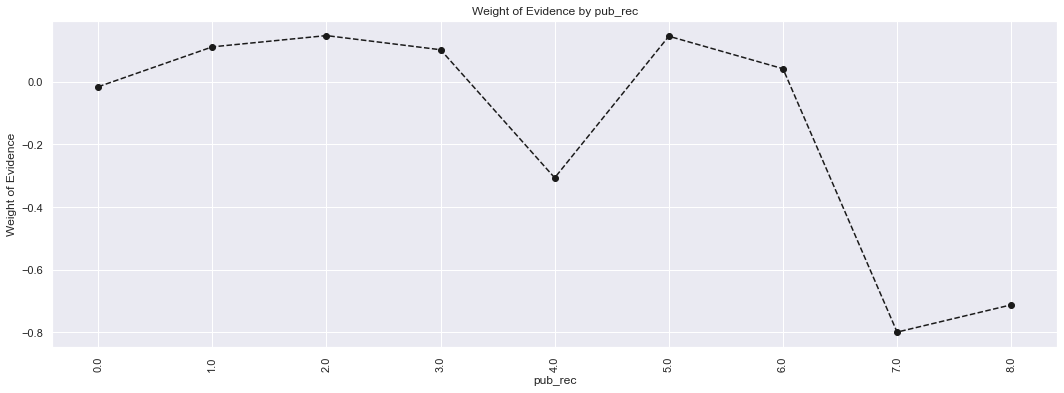

In [192]:
plot_by_woe(df_temp, 90)

In [193]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

##### total_acc_factor

In [194]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",125,0.776000,0.001340,97.0,28.0,0.001168,0.002748,-0.855734,NaN,NaN,inf
1,"(3.12, 6.24]",1499,0.850567,0.016074,1275.0,224.0,0.015349,0.021982,-0.359185,0.074567,0.496549,inf
2,"(6.24, 9.36]",3715,0.871871,0.039836,3239.0,476.0,0.038993,0.046712,-0.180639,0.021304,0.178547,inf
3,"(9.36, 12.48]",6288,0.874841,0.067427,5501.0,787.0,0.066224,0.077233,-0.153784,0.002970,0.026855,inf
4,"(12.48, 15.6]",8289,0.888286,0.088883,7363.0,926.0,0.088639,0.090873,-0.024892,0.013445,0.128892,inf
5,"(15.6, 18.72]",9843,0.890176,0.105547,8762.0,1081.0,0.105481,0.106084,-0.005703,0.001890,0.019189,inf
6,"(18.72, 21.84]",10270,0.893866,0.110126,9180.0,1090.0,0.110513,0.106968,0.032609,0.003690,0.038312,inf
7,"(21.84, 24.96]",9971,0.892789,0.106920,8902.0,1069.0,0.107167,0.104907,0.021312,0.001077,0.011297,inf
8,"(24.96, 28.08]",11873,0.892108,0.127315,10592.0,1281.0,0.127512,0.125711,0.014217,0.000681,0.007094,inf
9,"(28.08, 31.2]",7289,0.892715,0.078160,6507.0,782.0,0.078334,0.076742,0.020538,0.000607,0.006321,inf


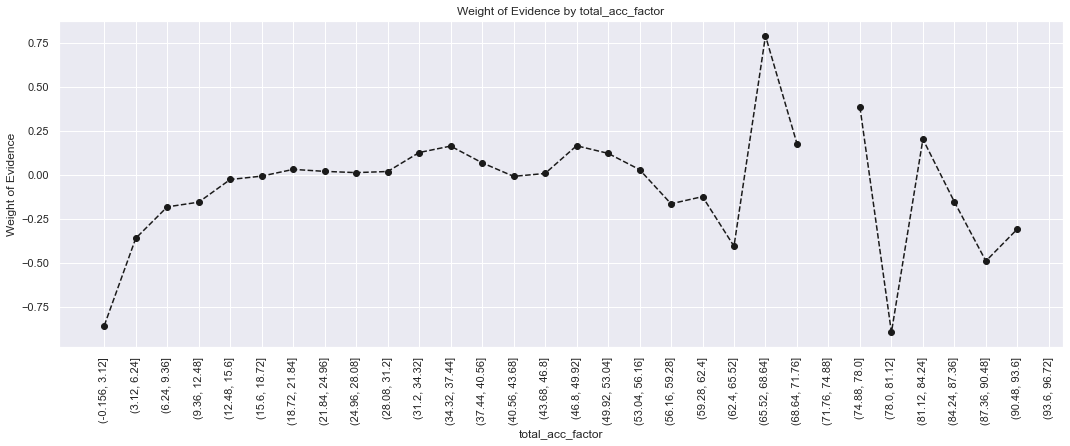

In [195]:
plot_by_woe(df_temp, 90)

In [196]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

##### acc_now_delinq

In [197]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92871,0.890827,0.995861,82732.0,10139.0,0.995967,0.994995,0.000976,NaN,NaN,0.000298
1,1.0,360,0.872222,0.003860,314.0,46.0,0.003780,0.004514,-0.177489,0.018605,0.178466,0.000298
2,2.0,22,0.818182,0.000236,18.0,4.0,0.000217,0.000393,-0.594163,0.054040,0.416674,0.000298
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000036,0.000098,-0.999628,0.068182,0.405465,0.000298


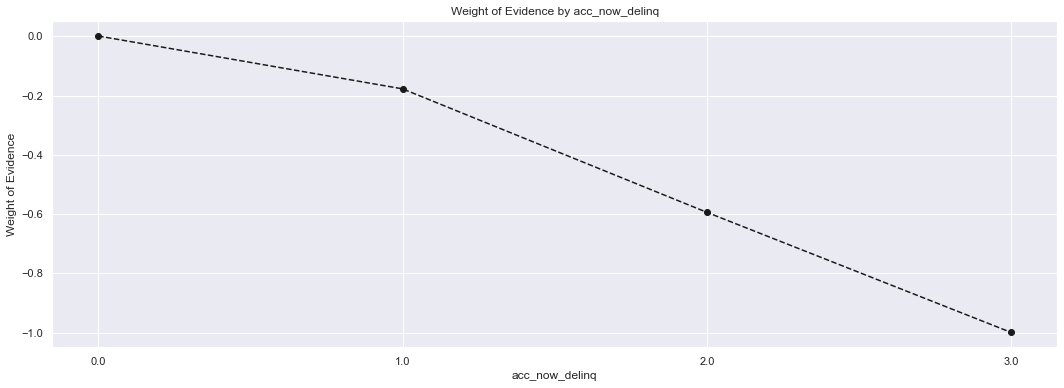

In [198]:
plot_by_woe(df_temp)

In [199]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

##### total_rev_hi_lim_factor

In [200]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2013.133, 1006.566]",238,0.840336,0.002552,200.0,38.0,0.002408,0.003729,-0.437509,NaN,NaN,inf
1,"(1006.566, 2013.133]",678,0.827434,0.007270,561.0,117.0,0.006754,0.011482,-0.530694,0.012903,0.093184,inf
2,"(2013.133, 3019.7]",1121,0.852810,0.012021,956.0,165.0,0.011509,0.016192,-0.341428,0.025376,0.189265,inf
3,"(3019.7, 4026.266]",1461,0.878166,0.015666,1283.0,178.0,0.015445,0.017468,-0.123068,0.025356,0.218360,inf
4,"(4026.266, 5032.832]",2163,0.867776,0.023194,1877.0,286.0,0.022596,0.028067,-0.216802,0.010389,0.093735,inf
5,"(5032.832, 6039.399]",2411,0.873911,0.025853,2107.0,304.0,0.025365,0.029833,-0.162248,0.006135,0.054554,inf
6,"(6039.399, 7045.966]",2376,0.871212,0.025478,2070.0,306.0,0.024920,0.030029,-0.186522,0.002699,0.024274,inf
7,"(7045.966, 8052.532]",2825,0.875398,0.030293,2473.0,352.0,0.029771,0.034544,-0.148685,0.004186,0.037837,inf
8,"(8052.532, 9059.098]",2686,0.873045,0.028802,2345.0,341.0,0.028230,0.033464,-0.170082,0.002353,0.021398,inf
9,"(9059.098, 10065.665]",3514,0.870233,0.037681,3058.0,456.0,0.036814,0.044750,-0.195217,0.002812,0.025135,inf


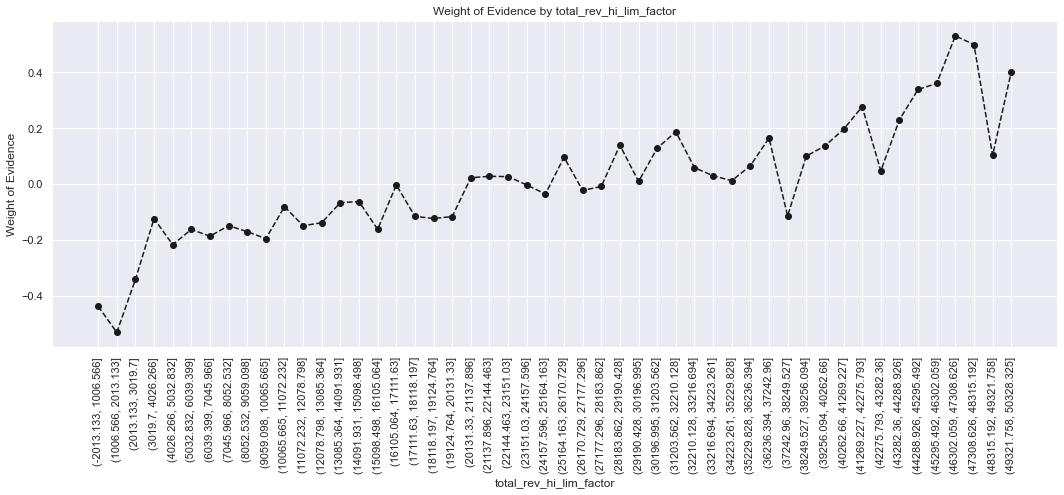

In [201]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [202]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

##### installment

In [203]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.369, 43.585]",485,0.872165,0.005201,423.0,62.0,0.005092,0.006084,-0.178003,NaN,NaN,inf
1,"(43.585, 71.41]",1246,0.904494,0.013361,1127.0,119.0,0.013567,0.011678,0.149950,0.032329,0.327953,inf
2,"(71.41, 99.235]",1731,0.895436,0.018562,1550.0,181.0,0.018660,0.017763,0.049273,0.009058,0.100678,inf
3,"(99.235, 127.06]",2292,0.896597,0.024577,2055.0,237.0,0.024739,0.023258,0.061730,0.001161,0.012458,inf
4,"(127.06, 154.885]",2602,0.886241,0.027901,2306.0,296.0,0.027761,0.029048,-0.045330,0.010356,0.107061,inf
5,"(154.885, 182.71]",4133,0.897653,0.044318,3710.0,423.0,0.044663,0.041511,0.073174,0.011412,0.118505,inf
6,"(182.71, 210.535]",4109,0.905086,0.044061,3719.0,390.0,0.044771,0.038273,0.156823,0.007433,0.083648,inf
7,"(210.535, 238.36]",3730,0.901877,0.039997,3364.0,366.0,0.040497,0.035918,0.120012,0.003210,0.036811,inf
8,"(238.36, 266.185]",4660,0.899785,0.049969,4193.0,467.0,0.050477,0.045829,0.096602,0.002091,0.023410,inf
9,"(266.185, 294.01]",4975,0.888844,0.053347,4422.0,553.0,0.053234,0.054269,-0.019251,0.010941,0.115853,inf


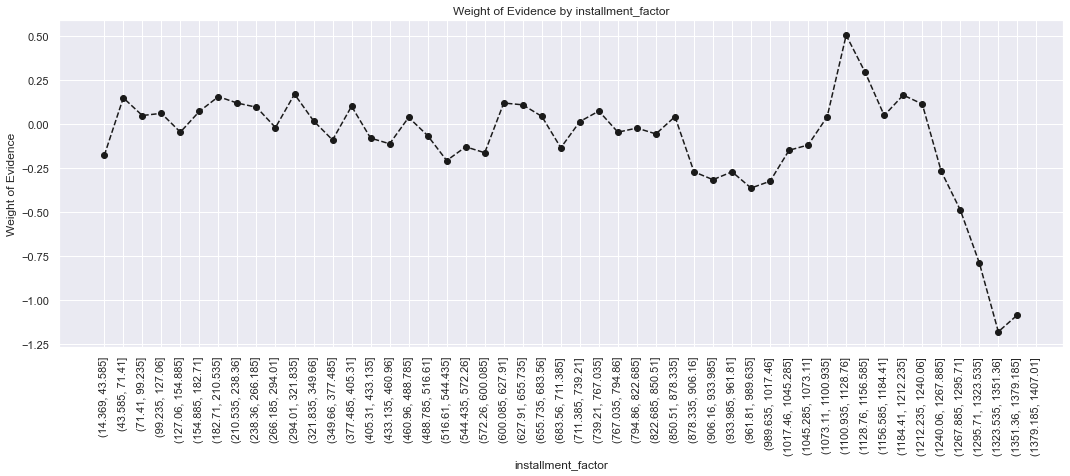

In [204]:
plot_by_woe(df_temp, 90)

##### annual_inc (data is concentrated at one point, need to seperate <= 140000, and coarse classing

In [205]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.750147,-0.125247,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.221197,0.280681,0.037273,0.405928,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.021099,0.432499,0.011063,0.151818,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460657,0.001900,0.028159,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485757,0.001656,0.025100,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457047,0.001897,0.028710,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140438,0.034336,0.683391,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367495,0.007433,0.227057,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386666,0.076923,inf,inf


In [206]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [207]:
#cut the values below 140000 to 50 parts
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-207-f5f583f0b7fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.761905,0.000958,64.0,20.0,0.000822,0.002043,-0.911157,0.238095,inf,inf
2,"(10208.0, 12912.0]",123,0.780488,0.001403,96.0,27.0,0.001232,0.002758,-0.805796,0.018583,0.105361,inf
3,"(12912.0, 15616.0]",304,0.851974,0.003467,259.0,45.0,0.003325,0.004597,-0.324142,0.071486,0.481654,inf
4,"(15616.0, 18320.0]",383,0.827676,0.004368,317.0,66.0,0.004069,0.006743,-0.505060,0.024297,0.180919,inf
5,"(18320.0, 21024.0]",733,0.840382,0.008359,616.0,117.0,0.007907,0.011953,-0.413234,0.012706,0.091826,inf
6,"(21024.0, 23728.0]",704,0.846591,0.008028,596.0,108.0,0.007651,0.011034,-0.366198,0.006209,0.047036,inf
7,"(23728.0, 26432.0]",1785,0.861064,0.020356,1537.0,248.0,0.019730,0.025337,-0.250148,0.014474,0.116050,inf
8,"(26432.0, 29136.0]",1355,0.853137,0.015452,1156.0,199.0,0.014839,0.020331,-0.314891,0.007928,0.064743,inf
9,"(29136.0, 31840.0]",2292,0.854276,0.026137,1958.0,334.0,0.025134,0.034123,-0.305769,0.001139,0.009122,inf


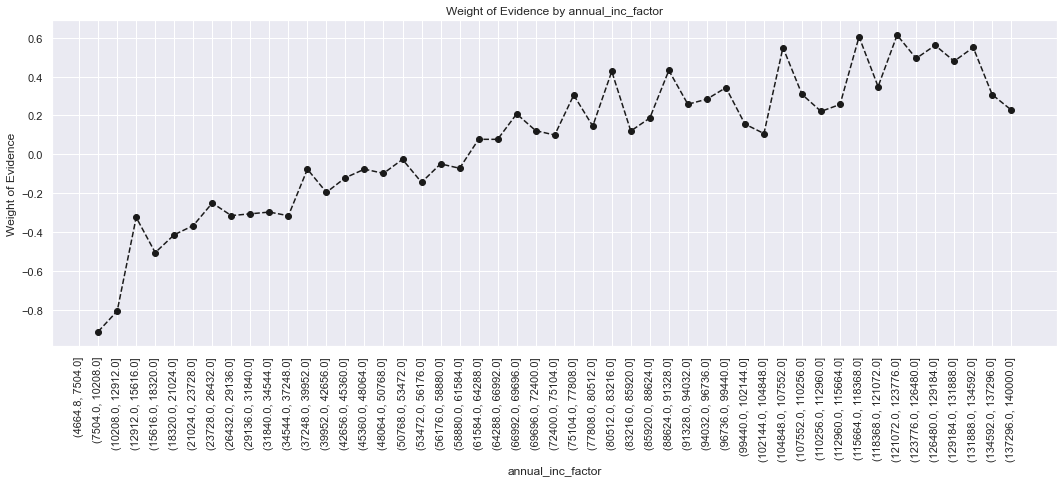

In [208]:
plot_by_woe(df_temp, 90)

In [209]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

##### mths_since_last_delinq (only coarse class data that does not have missing values)

In [210]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-210-61a345123922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,0.011729,0.106981,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,0.006621,0.064453,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,0.008789,0.090864,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,0.011789,0.120464,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,0.009032,0.091258,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,0.005269,0.056415,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,0.002882,0.031174,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,0.000857,0.009183,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,0.004350,0.045968,inf


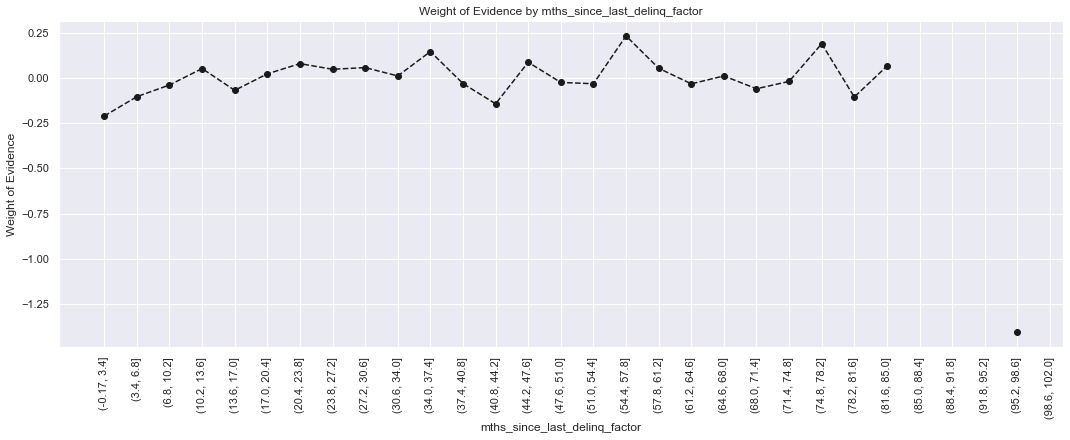

In [211]:
plot_by_woe(df_temp, 90)

In [212]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

##### dti

In [213]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",187,0.893048,0.002005,167.0,20.0,0.002010,0.001963,0.024021,NaN,NaN,0.038146
1,"(0.4, 0.8]",184,0.880435,0.001973,162.0,22.0,0.001950,0.002159,-0.101687,0.012613,0.125708,0.038146
2,"(0.8, 1.2]",223,0.892377,0.002391,199.0,24.0,0.002396,0.002355,0.017010,0.011942,0.118697,0.038146
3,"(1.2, 1.6]",255,0.905882,0.002734,231.0,24.0,0.002781,0.002355,0.166123,0.013506,0.149113,0.038146
4,"(1.6, 2.0]",315,0.892063,0.003378,281.0,34.0,0.003383,0.003337,0.013753,0.013819,0.152370,0.038146
5,"(2.0, 2.399]",324,0.913580,0.003474,296.0,28.0,0.003563,0.002748,0.259914,0.021517,0.246161,0.038146
6,"(2.399, 2.799]",366,0.918033,0.003925,336.0,30.0,0.004045,0.002944,0.317673,0.004453,0.057759,0.038146
7,"(2.799, 3.199]",442,0.907240,0.004740,401.0,41.0,0.004827,0.004024,0.182149,0.010793,0.135524,0.038146
8,"(3.199, 3.599]",484,0.933884,0.005190,452.0,32.0,0.005441,0.003140,0.549706,0.026644,0.367557,0.038146
9,"(3.599, 3.999]",563,0.902309,0.006037,508.0,55.0,0.006116,0.005397,0.124908,0.031575,0.424798,0.038146


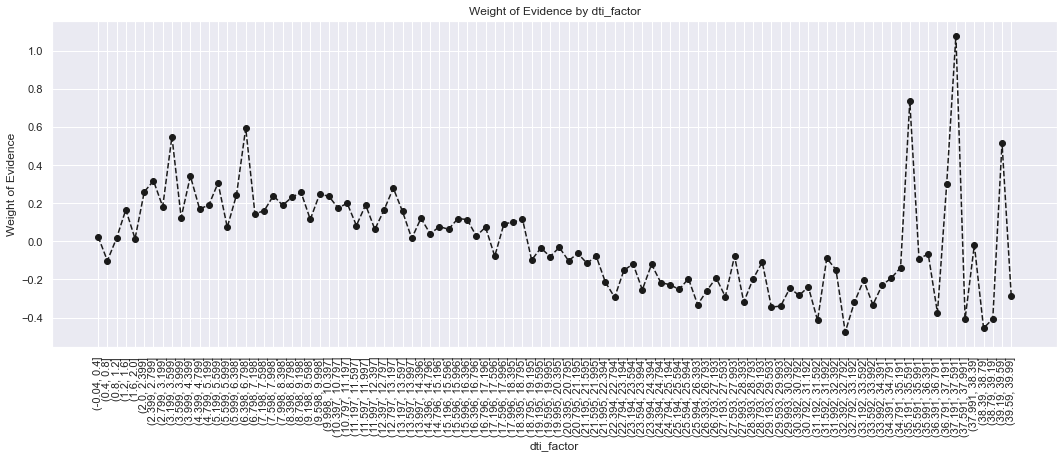

In [214]:
plot_by_woe(df_temp, 90)

In [215]:
#cuts the data below 35 into 50 parts, leave the data >35 to one part
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-215-35f7a78e538d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",328,0.884146,0.003544,290.0,38.0,0.003518,0.003758,-0.066005,NaN,NaN,0.033919
1,"(0.7, 1.4]",393,0.903308,0.004246,355.0,38.0,0.004306,0.003758,0.136232,0.019162,0.202237,0.033919
2,"(1.4, 2.1]",536,0.895522,0.005792,480.0,56.0,0.005823,0.005538,0.050135,0.007785,0.086097,0.033919
3,"(2.1, 2.8]",607,0.915980,0.006559,556.0,51.0,0.006745,0.005044,0.290643,0.020458,0.240508,0.033919
4,"(2.8, 3.5]",811,0.924784,0.008763,750.0,61.0,0.009098,0.006032,0.410900,0.008804,0.120257,0.033919
5,"(3.5, 4.2]",970,0.903093,0.010481,876.0,94.0,0.010626,0.009296,0.133772,0.021691,0.277128,0.033919
6,"(4.2, 4.9]",1140,0.913158,0.012318,1041.0,99.0,0.012628,0.009790,0.254518,0.010065,0.120746,0.033919
7,"(4.9, 5.6]",1370,0.911679,0.014803,1249.0,121.0,0.015151,0.011966,0.236009,0.001479,0.018509,0.033919
8,"(5.6, 6.3]",1491,0.904762,0.016111,1349.0,142.0,0.016364,0.014043,0.152992,0.006917,0.083016,0.033919
9,"(6.3, 7.0]",1722,0.926829,0.018607,1596.0,126.0,0.019360,0.012460,0.440674,0.022067,0.287682,0.033919


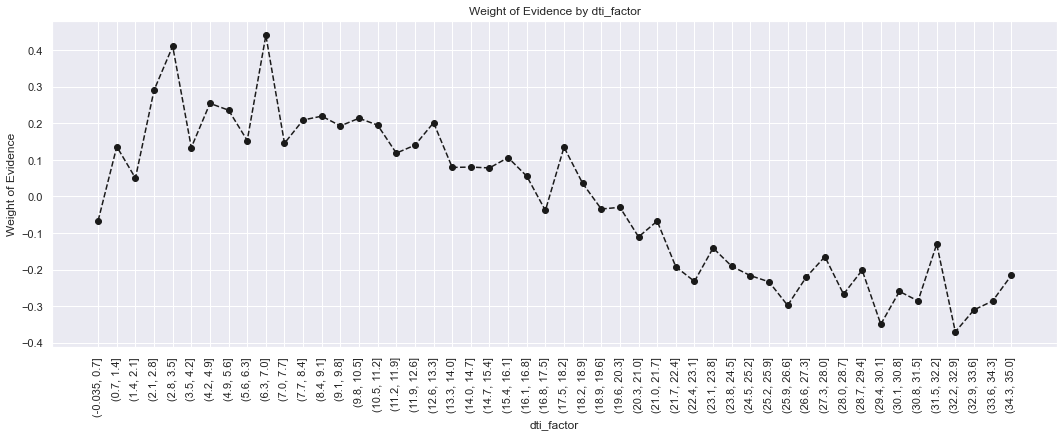

In [216]:
plot_by_woe(df_temp, 90)

In [217]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

##### mths_since_last_record

In [218]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-218-8da89b1d64fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",244,0.741803,0.019410,181.0,63.0,0.016036,0.049065,-1.118309,NaN,NaN,inf
1,"(2.58, 5.16]",36,0.888889,0.002864,32.0,4.0,0.002835,0.003115,-0.094230,0.147086,1.024079,inf
2,"(5.16, 7.74]",39,0.923077,0.003102,36.0,3.0,0.003190,0.002336,0.311235,0.034188,0.405465,inf
3,"(7.74, 10.32]",66,0.939394,0.005250,62.0,4.0,0.005493,0.003115,0.567169,0.016317,0.255933,inf
4,"(10.32, 12.9]",42,0.833333,0.003341,35.0,7.0,0.003101,0.005452,-0.564234,0.106061,1.131402,inf
5,"(12.9, 15.48]",69,0.869565,0.005489,60.0,9.0,0.005316,0.007009,-0.276551,0.036232,0.287682,inf
6,"(15.48, 18.06]",95,0.863158,0.007557,82.0,13.0,0.007265,0.010125,-0.331902,0.006407,0.055350,inf
7,"(18.06, 20.64]",58,0.965517,0.004614,56.0,2.0,0.004961,0.001558,1.158533,0.102359,1.490435,inf
8,"(20.64, 23.22]",101,0.891089,0.008034,90.0,11.0,0.007974,0.008567,-0.071757,0.074428,1.230290,inf
9,"(23.22, 25.8]",94,0.946809,0.007478,89.0,5.0,0.007885,0.003894,0.705527,0.055719,0.777284,inf


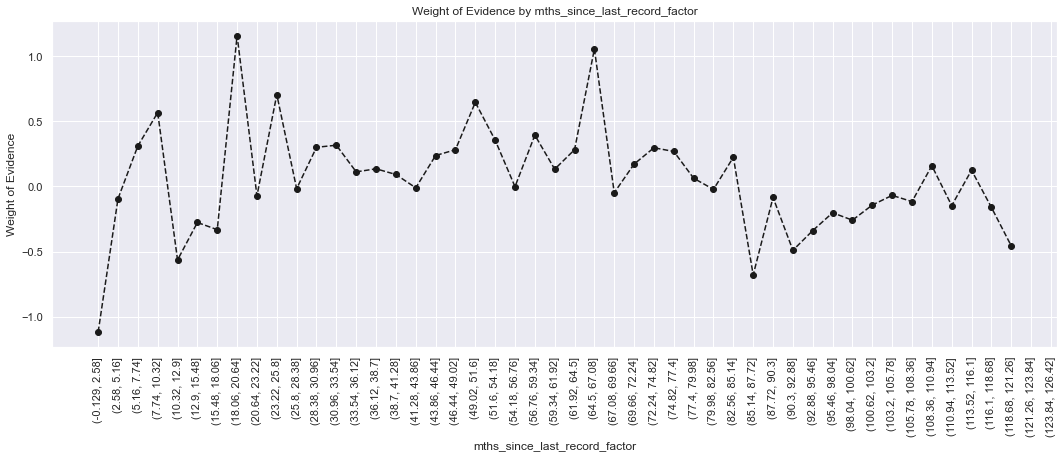

In [219]:
plot_by_woe(df_temp, 90)

In [220]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

# IMPORTANT: PREPROCESSING THE TEST DATASET
### - save the 'df_inputs_prepr' to 'loan_data_inputs_train' for the processed training data
### - Repeat the process from the 'splitting data' part and change 'train' to 'test'
### - Run the whole code again and store the processed test data in 'loan_data_inputs_test'

In [221]:
loan_data_inputs_train = df_inputs_prepr #comment this line
#loan_data_inputs_test = df_inputs_prepr #uncomment this line

# Save cleaned data into new CSV file

In [222]:
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_train.shape)
print(loan_data_targets_test.shape)

(373028, 324)
(93257, 324)
(373028,)
(93257,)


In [223]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')